# Description:

A notebook working through data exploration to answer the question:

"Do you think that any other heuristic (non-machine learning)-based approaches, besides simple thresholding, would work in this case? Explain."


Other heuristics could be size/shape related, or something more complicated related to information content, fourier information, resolution, contrast.

- Regarding Size/Shape methods: Based on visual inspection and the nature of MRI images, I would expect these methods to have similar or worse distributions than those we saw with thresholding.  See workup below

- Regarding contrast/resolution methods:  These will still depend on pixel intensities and might help as a preprocessing step before thresholding.  However, It'd be surprising if they can increase the F1 score from 0.4 to greater than 0.9!

If we explore contrast/resolution methods further, we have to first ask "what is the cause of the broad intensity distribution"?  Is it noise?  Is it a natural part of the image?

If the answer is the latter (for example, if plaques or other blood-components generate different intensities in MRI images), then only more labeled training data could help.  If the answer is the former, then contrast/resolution methods absolutely could help.  One could even consider a preprocessing step, and could try methods like watershedding, sobel filtering, denoising methods, on top of thresholding.

In [3]:
imgs, i_msk, o_msk = load_data.load_all_patients('./final_data')

Below is some quick code to show how size of the segmented region might not work so well as a heuristic.

num of o-masks = 46
min num of pixels = 344
max num of pixels = 3395


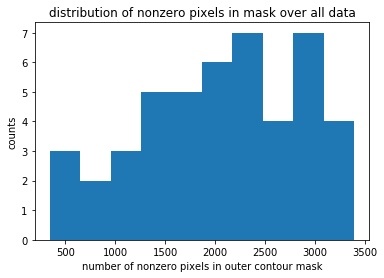

In [18]:
# simply count number of pixels in the mask as a metric for size
nonzero = [np.count_nonzero(element) for element in o_msk if type(element) != type(None)]
print("num of o-masks = "+str(len(nonzero)))
print("min num of pixels = "+str(np.min(nonzero)))
print("max num of pixels = "+str(np.max(nonzero)))

out = np.asarray(nonzero)

plt.hist(out.ravel(), bins=10, range=(np.min(nonzero), np.max(nonzero)))
plt.xlabel('number of nonzero pixels in outer contour mask')
plt.ylabel('counts')
plt.title('distribution of nonzero pixels in OUTER mask over all data')
plt.show()


num of i-masks = 96
min num of pixels = 62
max num of pixels = 2289


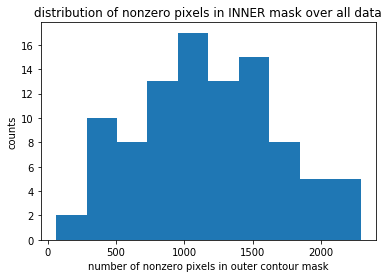

In [21]:
# simply count number of pixels in the mask as a metric for size
nonzero = [np.count_nonzero(element) for element in i_msk if type(element) != type(None)]
print("num of i-masks = "+str(len(nonzero)))
print("min num of pixels = "+str(np.min(nonzero)))
print("max num of pixels = "+str(np.max(nonzero)))

out = np.asarray(nonzero)

plt.hist(out.ravel(), bins=10, range=(np.min(nonzero), np.max(nonzero)))
plt.xlabel('number of nonzero pixels in outer contour mask')
plt.ylabel('counts')
plt.title('distribution of nonzero pixels in INNER mask over all data')
plt.show()
